### STUDENT DETAILS

#### NAMES

- Laaria Chris  - laaria.chris@student.moringaschool.com

- Henry Rono    - henry.rono@student.moringaschool.com

- Beryl Agai    - beryl.agai@student.moringaschool.com


#### MODULE 

Full time

#### INSTRUCTORS

- Asha Deen

- Lucille Kaleha

#### JIRA BOARD

https://moringaprojectss.atlassian.net/jira/core/projects/PM/board?atlOrigin=eyJpIjoiNTM0MjRkYTYzNjJjNGUyNjg5MDA3NTAxZDJhY2NmOTciLCJwIjoiaiJ9



## PAEDIATRIC PNEUMONIA DETECTION THROUGH XRAY IMAGE CLASSIFICATION :A DEEP LEARNING APPROACH



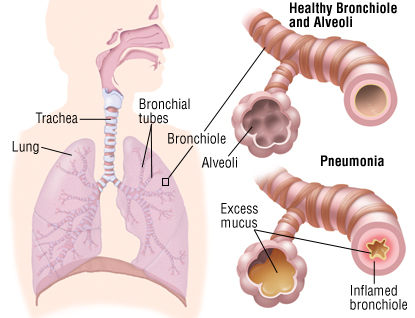

### 1. BUSINESS UNDERSTANDING

#### 1.1.1 Overview

From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.


#### 1.1.2 Stakeholders Definition

The possible stakeholders in this project are:

- Doctors and Radiologists: Receive support in diagnosing pneumonia more accurately and quickly.


- Patients: Benefit from faster diagnoses and timely treatment, leading to better health outcomes.


- Hospital and Clinic Administrators: Improve diagnostic efficiency and patient care while reducing operational costs.


- Healthcare Regulatory Authorities: Ensure the diagnostic tool adheres to medical standards, enhancing patient safety.


#### 1.1.3 Challenges Faced in paediatric peneumonia detection

Some of the challenges experienced in detecting paediatric pneumonia are:

- Variability in Symptoms: Pediatric pneumonia symptoms can vary widely, making it difficult to diagnose based solely on clinical presentation.


- Radiographic Differences: Children's chest x-rays can be harder to interpret due to differences in anatomy and the presence of other conditions.


- Limited Data: There is often a lack of large, labeled pediatric datasets for training and validating AI models.


- Co-morbidities: Children may have other respiratory illnesses that complicate the diagnosis of pneumonia.


- Ethical and Privacy Concerns: Ensuring the ethical use of children's medical data and maintaining strict privacy standards can be challenging.

#### 1.1.4 Proposed Solution and Sucess Criteria

- Customized CNN Architectures: Develop and train convolutional neural networks tailored for pediatric chest x-ray images, aiming for a ROC-AUC score of at least 0.90.


- Multi-task Learning: Implement models capable of diagnosing pneumonia and other respiratory conditions simultaneously, achieving a balanced accuracy of over 85% for all target conditions.


- Data Augmentation and Synthesis: Use data augmentation and synthetic data generation to create a diverse training dataset, improving the F1-score by 10% on the test set.

#### 1.1.5 Brief Conclusion

This project leverages advanced deep learning techniques to enhance the accuracy and efficiency of pediatric pneumonia detection from chest x-ray images. By addressing key challenges with customized CNN architectures, multi-task learning, and data augmentation, we aim to provide a reliable and scalable diagnostic tool for improved healthcare outcomes.








### 1.2 PROBLEM STATEMENT

In 2017, pneumonia was responsible for 15% of deaths in children under five years old, making it the most common cause of death in children.

Chest X-ray is the first line of investigation and commonly used in confirming infection and assessing the severity. However, the interpretation of chest X-rays can be tedious and requires experienced physicians. The chest X-ray findings may even vary among different interpreters.

Deep learning, particularly Convolutional Neural Networks(CNN), is an crucial asset in medical image analysis. By automatically extracting the important features, CNN uncovers hidden patterns in images and can accurately detect pneumonia in chest X-rays.

Training a CNN from scratch can be time-consuming and requires a vast image dataset for superior performance. However, a huge image dataset is always a challenge in the medical field. Alternatively, using pre-trained models such as VGG-16 can overcome this limitation, as these models have been pre-trained on a huge dataset. By applying transfer learning, these models can achieve superior performance even on a small dataset.


### 1.3 OBJECTIVES

#### 1.3.1 Main Objective

Our main objective is develop a deep learning-based model to accurately classify whether a pediatric patient has pneumonia from chest x-ray images,with at least 90% accuracy to improve diagnostic accuracy and efficiency in a clinical setting.


#### 1.3.2 Business Questions

The business questions that we need to ask so as to meet our main objective include:

- What is the anticipated impact on diagnostic efficiency and accuracy?
Evaluate how the model will improve the speed and precision of pneumonia diagnoses.


- What are the cost implications of implementing the model?
Assess the financial investment required versus potential cost savings from reduced misdiagnoses.


- How will the model integrate with existing healthcare systems?
Determine the technical and operational requirements for seamless integration into current IT infrastructure.


- What are the expected benefits for patients and healthcare providers?
Identify the improvements in patient outcomes and support provided to healthcare professionals.


#### 1.3.3 Success Metrics

- Diagnostic Accuracy: Achieve an accuracy of at least 90% in classifying pneumonia from chest x-ray images.


- ROC-AUC Score: Obtain a Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score of 0.90 or higher, indicating strong performance in distinguishing between pneumonia and non-pneumonia cases.


- Reduction in Diagnostic Time: Decrease the average time for pneumonia diagnosis by at least 30% compared to current methods.


- Cost Savings: Realize a measurable reduction in costs associated with misdiagnoses and unnecessary treatments, aiming for a return on investment (ROI) of at least 20%.


- User Satisfaction: Achieve positive feedback from healthcare providers and patients, with a satisfaction rating of 85% or higher regarding the model’s usability and impact on care.








## B. DATA UNDERSTANDING

In [3]:
# Import libraries
import pandas as pd  # data processing
import numpy as np  # linear algebra
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import os
import warnings
import random

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import backend as K

# Image processing and visualizations
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2

# Ignore future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

2024-07-29 15:05:45.453093: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 15:05:45.684025: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 15:05:46.055077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 15:05:46.460469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 15:05:46.462129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-29 15:05:46.824128: I tensorflow/core/platform/cpu_feature_guard.cc:

### Setting Directories

In [124]:
#Defines directory paths for train, test, and validation datasets.
base_dir = Path("chest_xray/")
test_dir = base_dir / "test/"
train_dir = base_dir / "train/"
val_dir = base_dir / "val/"


The above code sets up directory paths for different dataset splits (train, test, validation) using Pathlib module.

### Data Loading

#### Files in test dataset

Set paths for normal and pneumonia images in the test dataset.

In [125]:
# Files in test dataset
os.listdir(test_dir)
test_normal_dir = test_dir / "NORMAL"
test_pneumonia_dir = test_dir / "PNEUMONIA"

In [126]:
test_normal_dir = test_dir /"NORMAL" #to set the path to the normals in test set
test_pneumonia_dir = test_dir /"PNEUMONIA" #to set the path to the pneumonias in test set

#### Files in train Dataset

In [127]:
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

Set paths for normal and pneumonia images in the train dataset.

In [128]:
train_normal_dir = train_dir /"NORMAL" #to set the path to the normals in train set
train_pneumonia_dir = train_dir /"PNEUMONIA" #to set the path to the pneumonias in train set

#### Files in validatation Dataset

In [129]:
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

Set paths for normal and pneumonia images in the validation dataset.

In [130]:
valid_normal_dir = val_dir /"NORMAL" #to set the path to the normals in validation set
valid_pneumonia_dir = val_dir /"PNEUMONIA" #to set the path to the pneumonias in validation set

### Labeling

#### Setting the dataset for training
Each image is paired with its corresponding label (0 for normal, 1 for pneumonia) using loops and lists.

In [131]:
train_normal= train_normal_dir.glob("*.jpeg") #to take the normal images from train set 
train_pneumonia=train_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the train set
train_set=[]#to add all the train data into one list, we created a blank list

In [132]:
for img in train_normal: #to add every image of normals in trainset to the list
  train_set.append((img, 0)) #we add 0 with normal images as label
for img in train_pneumonia:#to add every image of pneumonias in trainset to the list
  train_set.append((img, 1)) #we add 1 with pneumonia images as label

In [133]:
print(train_set[:15]) #to check what our list look like

[(PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-0575-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0127-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-1091-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-1039-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-1038-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-1150-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0207-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-0555-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0430-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-1028-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0531-0001-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0549-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0343-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0319-0001.jpeg'), 0), (PosixPath('chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg'), 0)]


In [134]:
train_set=pd.DataFrame(train_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features


In [135]:
train_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

image  label
0  chest_xray/train/NORMAL/NORMAL2-IM-0575-0001.jpeg      0
1          chest_xray/train/NORMAL/IM-0127-0001.jpeg      0
2  chest_xray/train/NORMAL/NORMAL2-IM-1091-0001.jpeg      0
3  chest_xray/train/NORMAL/NORMAL2-IM-1039-0001.jpeg      0
4  chest_xray/train/NORMAL/NORMAL2-IM-1038-0001.jpeg      0

In [136]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

image  label
0  chest_xray/train/PNEUMONIA/person1748_bacteria...      1
1          chest_xray/train/NORMAL/IM-0301-0001.jpeg      0
2  chest_xray/train/PNEUMONIA/person1242_virus_21...      1
3  chest_xray/train/PNEUMONIA/person256_virus_537...      1
4  chest_xray/train/PNEUMONIA/person1024_bacteria...      1

In [137]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

image  label
0  chest_xray/train/NORMAL/NORMAL2-IM-1360-0001.jpeg      0
1  chest_xray/train/PNEUMONIA/person529_virus_105...      1
2  chest_xray/train/PNEUMONIA/person1430_bacteria...      1
3  chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg      0
4  chest_xray/train/PNEUMONIA/person363_bacteria_...      1

#### Setting the dataset for valdiation

In [138]:
valid_normal= valid_normal_dir.glob("*.jpeg") #to take the normal images from validation set 
valid_pneumonia=valid_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the validation set
valid_set=[] #to add all the validation data into one list, we created a blank list

In [139]:
for img in valid_normal: #to add every image of normals in validationset to the list
  valid_set.append((img, 0)) #we add 0 with normal images as label
for img in valid_pneumonia:#to add every image of pneumonias in validationset to the list
  valid_set.append((img, 1)) #we add 1 with pneumonia images as label


In [140]:
print(valid_set[:15]) #to check what our list look like

[(PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'), 0), (PosixPath('chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'), 0), (PosixPath('chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'), 1), (PosixPath('chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg'), 1), (PosixPath('chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'), 1), (PosixPath('chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg'), 1), (PosixPath('chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg'), 1), (PosixPath('chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'), 1), (PosixPath('chest_x

In [141]:
valid_set=pd.DataFrame(valid_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
valid_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

image  label
0  chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg      0
1  chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg      0
2  chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg      0
3  chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg      0
4  chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg      0

In [142]:
valid_set=valid_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
valid_set=valid_set.reset_index(drop=True) #to set the indexes as if first time
valid_set.head()

image  label
0    chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg      0
1  chest_xray/val/PNEUMONIA/person1954_bacteria_4...      1
2    chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg      0
3    chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg      0
4    chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg      0

#### Setting the dataset for test

In [143]:
test_normal= test_normal_dir.glob("*.jpeg") #to take the normal images from test set 
test_pneumonia=test_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the test set
test_set=[]#to add all the test data into one list, we created a blank list

In [144]:
for img in test_normal: #to add every image of normals in test set to the list
  test_set.append((img, 0)) #we add 0 with normal images as label
for img in test_pneumonia:#to add every image of pneumonias in test set to the list
  test_set.append((img, 1)) #we add 1 with pneumonia images as label


In [145]:
print(test_set[:15]) #to check what our list look like

[(PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0329-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0287-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0348-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/IM-0030-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0327-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/IM-0065-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/IM-0111-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0007-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0028-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/IM-0077-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0297-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0041-0001.jpeg'), 0), (PosixPath('chest_xray/test/NORMAL/IM-0110-0001.jpeg'), 0)]


In [146]:
test_set=pd.DataFrame(test_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
test_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

image  label
0  chest_xray/test/NORMAL/NORMAL2-IM-0329-0001.jpeg      0
1  chest_xray/test/NORMAL/NORMAL2-IM-0287-0001.jpeg      0
2  chest_xray/test/NORMAL/NORMAL2-IM-0348-0001.jpeg      0
3  chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg      0
4          chest_xray/test/NORMAL/IM-0030-0001.jpeg      0

In [147]:
test_set=test_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
test_set=test_set.reset_index(drop=True) #to set the indexes as if first time
test_set.head()

image  label
0           chest_xray/test/NORMAL/IM-0083-0001.jpeg      0
1   chest_xray/test/PNEUMONIA/person32_virus_71.jpeg      1
2  chest_xray/test/PNEUMONIA/person103_bacteria_4...      1
3  chest_xray/test/PNEUMONIA/person83_bacteria_41...      1
4  chest_xray/test/PNEUMONIA/person1665_virus_287...      1

### Data Visualization

Visualize sample images from the training set and displays distribution plots to show the imbalance between normal and pneumonia images.

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


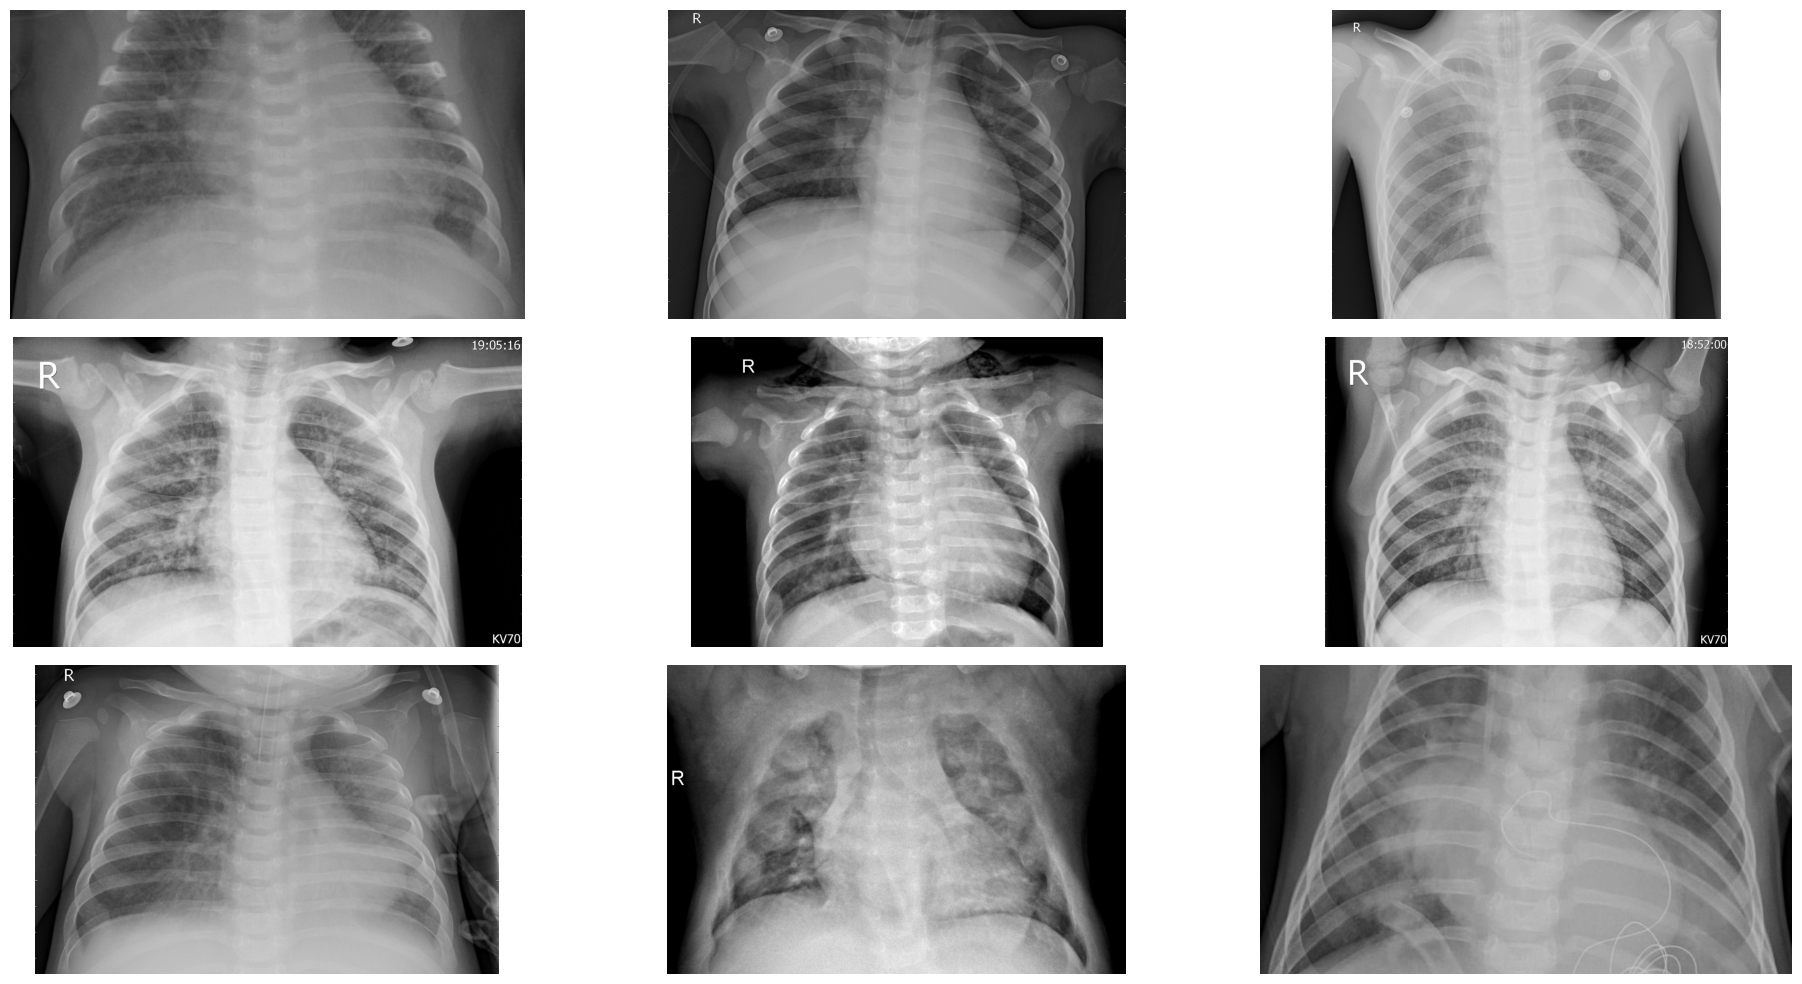

In [148]:
train_dir = "chest_xray/train"
test_dir = "chest_xray/test"
val_dir = "chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

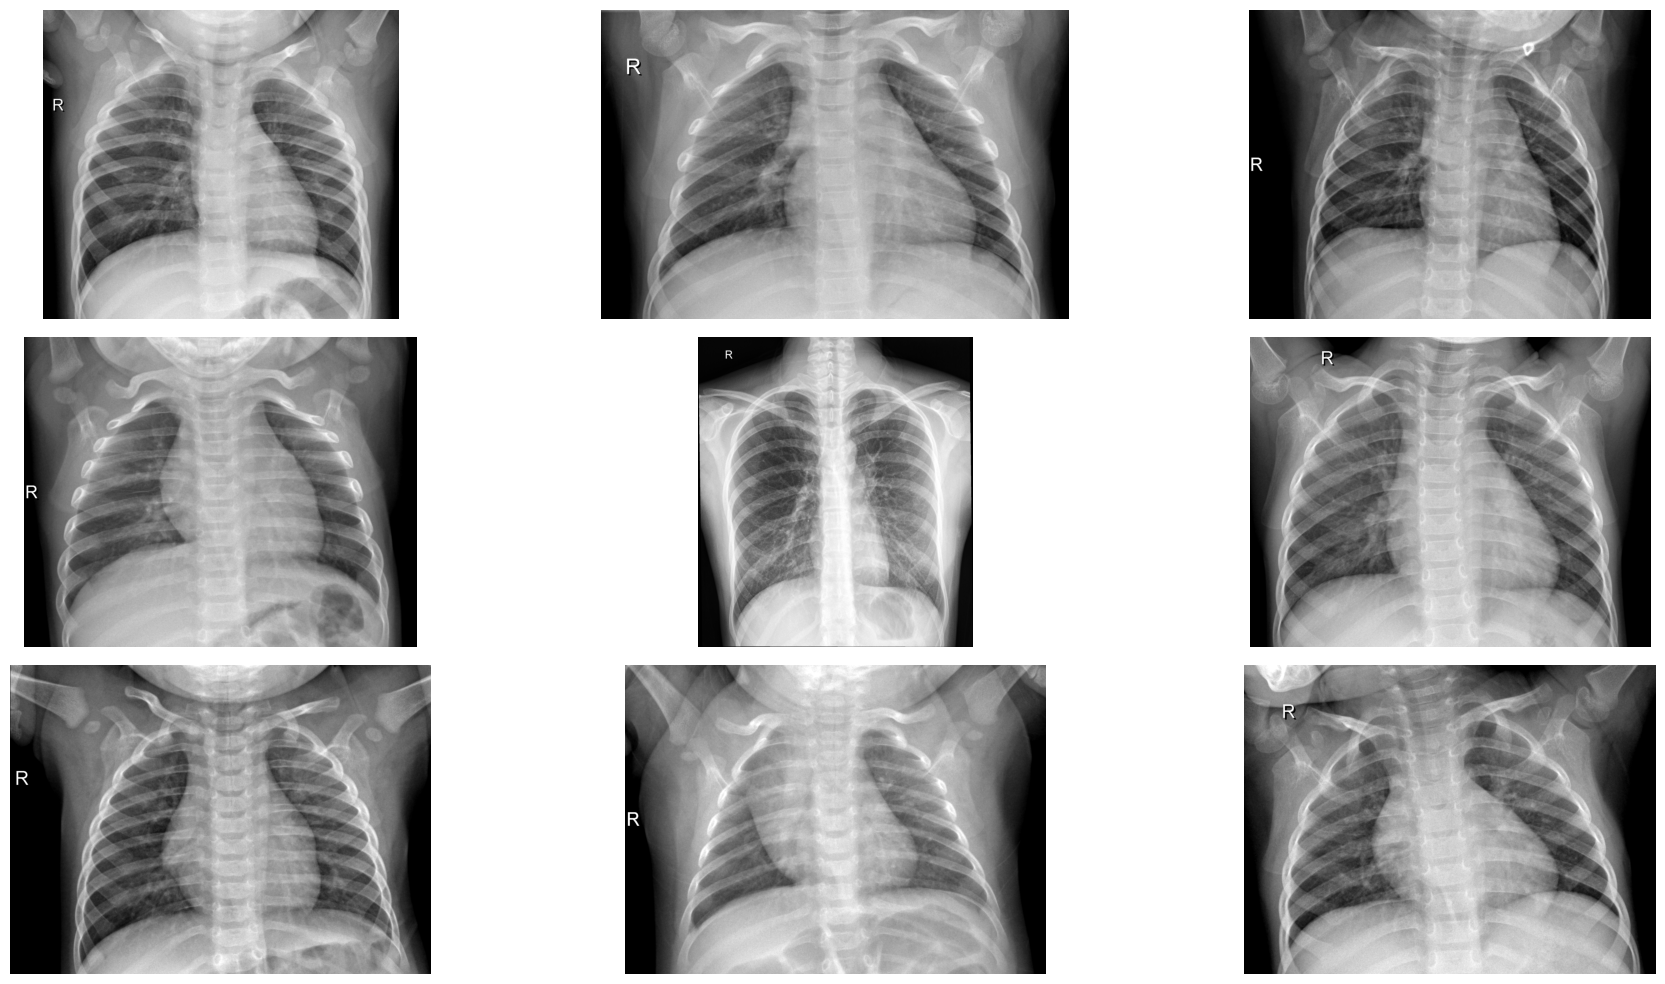

In [149]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1469 pixels width and 1688 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 138.1509 and the standard deviation is 56.8164


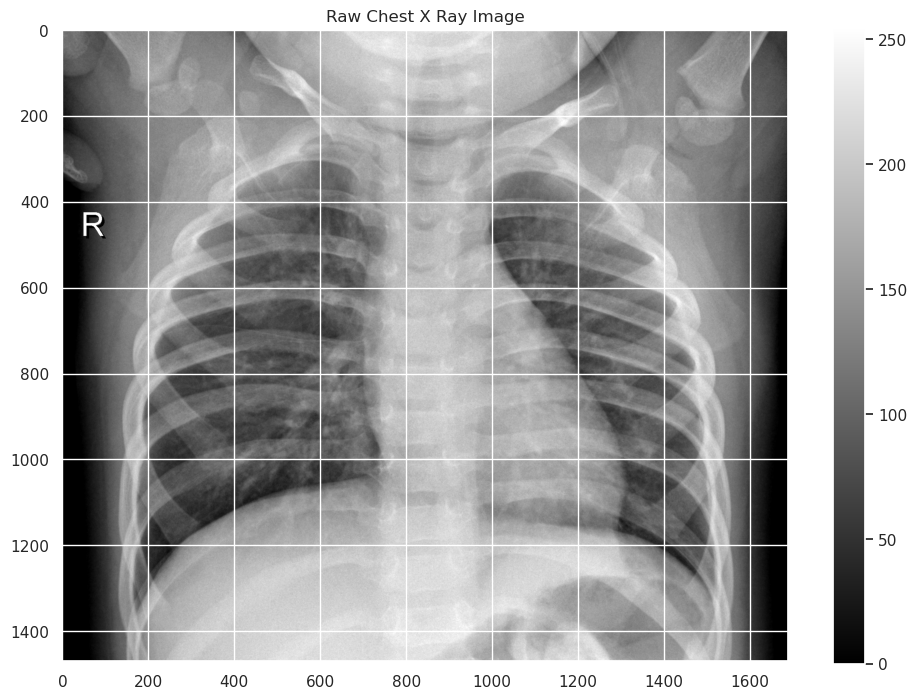

In [150]:
normal_img = os.listdir("chest_xray/train/NORMAL")[0]
normal_dir = "chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

/tmp/ipykernel_7019/2497118673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

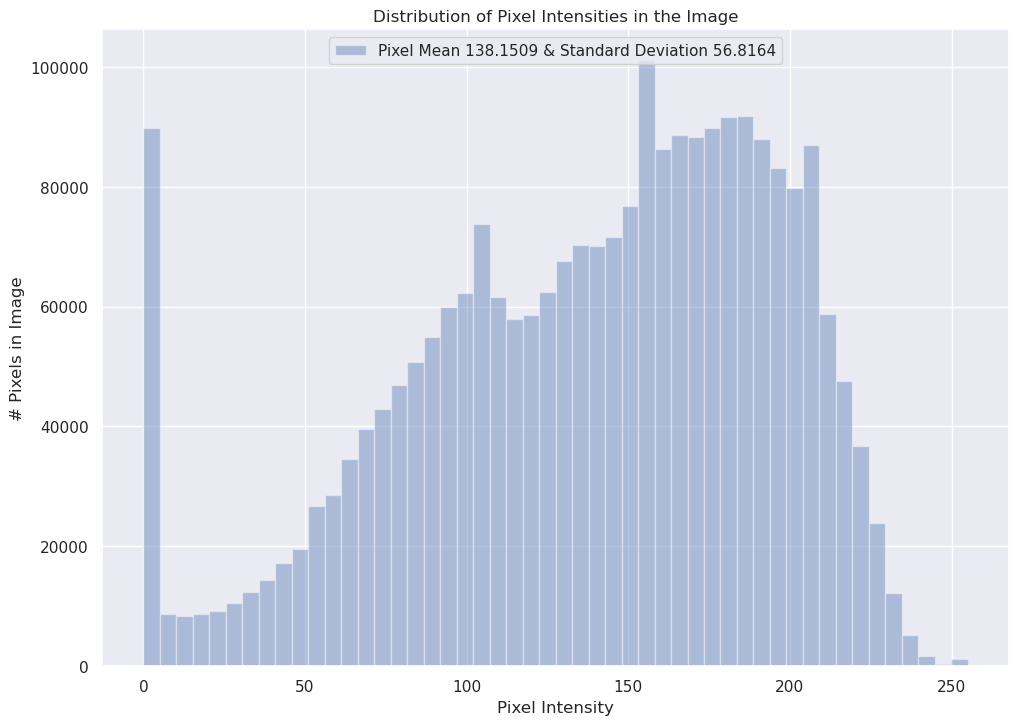

In [151]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [152]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets

Now we need to build a new generator for validation and t esting data.

Why can't use the same generator as for the training data?

Look back at the generator we wrote for the training data.

It normalizes each image per batch, meaning thatit uses batch statistics.
We should not do this with the test and validation data, since in a real life scenario we don't process incoming images a batch at a time (we process one image at a time).
Knowing the average per batch of test data would effectively give our model an advantage (The model should not have any information about the test data).
What we need to do is to normalize incomming test data using the statistics computed from the training set.

Based on this analysis, our dataset shows an imbalance between the number of "Normal" and "Pneumonia" images. To address this, we will employ Data Augmentation techniques specifically aimed at increasing the number of "Normal" images.






In [153]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.6949 and the minimum is -3.3607
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


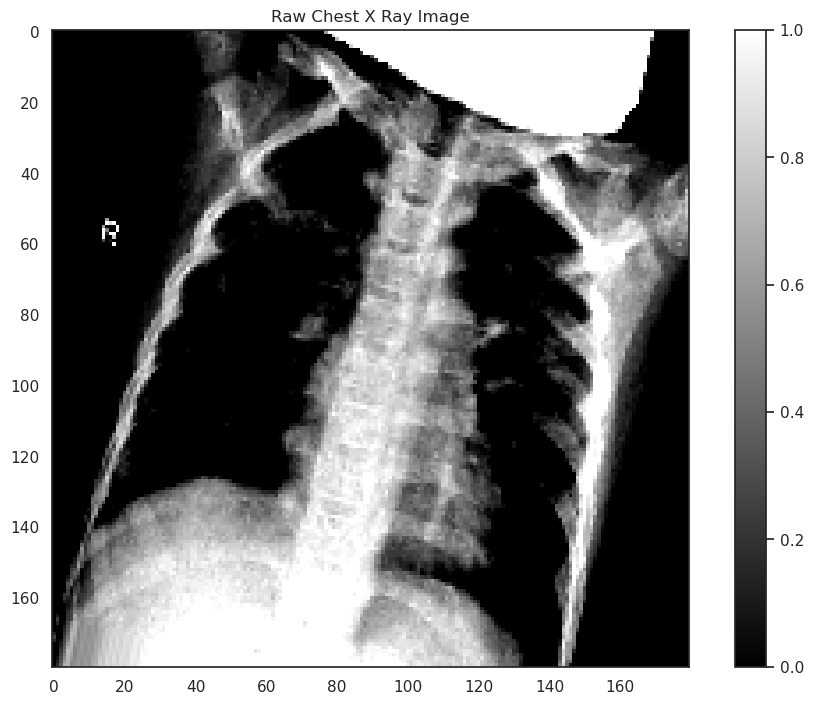

In [154]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/tmp/ipykernel_7019/1221570370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

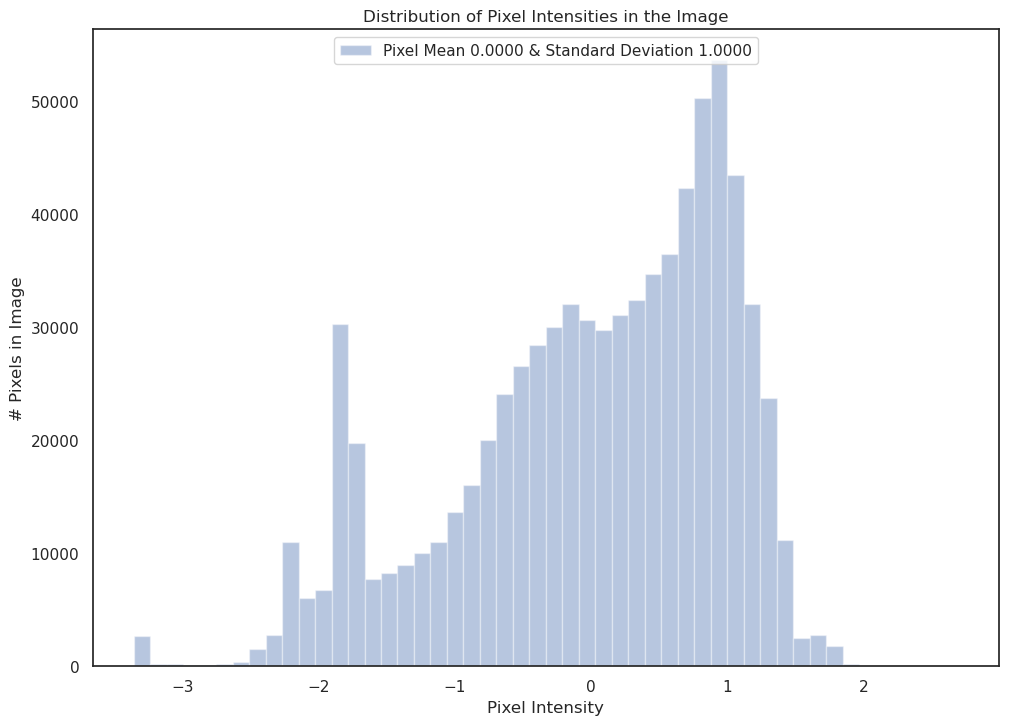

In [155]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

## Impact of imbalance data on loss function

In [156]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [157]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)             │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 176, 176, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 84, 84, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 38, 38, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     5,914,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,203,681 (23.67 MB)

 Trainable params: 6,202,785 (23.66 MB)

 Non-trainable params: 896 (3.50 KB)

In [159]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10


/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6991 - loss: 2.0842

2024-07-29 01:48:17.866643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6998 - loss: 2.0752 - val_accuracy: 0.5000 - val_loss: 8.6757
Epoch 2/10


/home/laaria/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8700 - loss: 0.1644 - val_accuracy: 0.5000 - val_loss: 17.2822
Epoch 3/10


2024-07-29 01:50:03.901714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8509 - loss: 0.1356 - val_accuracy: 0.6250 - val_loss: 2.3786
Epoch 4/10


2024-07-29 01:51:47.649936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 868ms/step - accuracy: 0.8443 - loss: 0.1849 - val_accuracy: 0.5000 - val_loss: 5.1934
Epoch 5/10


2024-07-29 01:53:14.568344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8900 - loss: 0.1113 - val_accuracy: 0.6250 - val_loss: 3.9211
Epoch 6/10


2024-07-29 01:55:34.139952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8377 - loss: 0.1428

2024-07-29 01:57:59.027786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8379 - loss: 0.1427 - val_accuracy: 0.6875 - val_loss: 0.6597
Epoch 7/10
 52/100 ━━━━━━━━━━━━━━━━━━━━ 1:06 1s/step - accuracy: 0.8586 - loss: 0.1260

2024-07-29 01:59:11.314336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 719ms/step - accuracy: 0.8700 - loss: 0.1203 - val_accuracy: 0.6250 - val_loss: 2.6051
Epoch 8/10


2024-07-29 01:59:11.938870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8641 - loss: 0.1187

2024-07-29 02:01:38.029034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8643 - loss: 0.1187 - val_accuracy: 0.6875 - val_loss: 1.2295
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8953 - loss: 0.1052 - val_accuracy: 0.6250 - val_loss: 1.5700
Epoch 10/10


2024-07-29 02:04:00.160639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9145 - loss: 0.0838

2024-07-29 02:06:21.789154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9145 - loss: 0.0839 - val_accuracy: 0.5625 - val_loss: 0.6692


Text(0.5, 1.0, 'Accuracy Evolution')

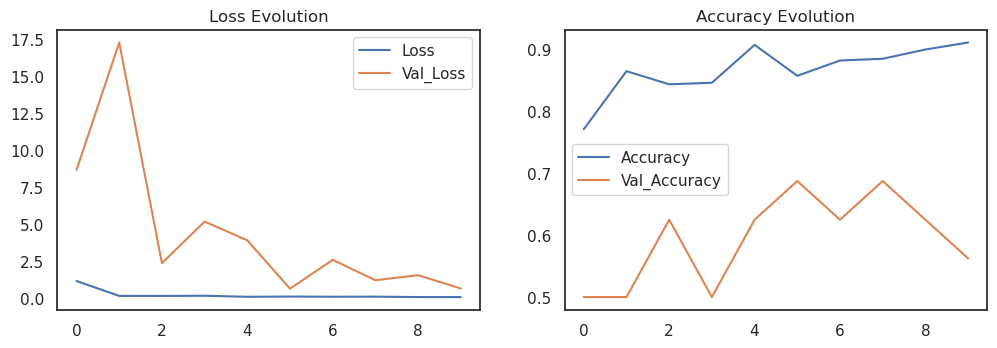

In [160]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [161]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6097 - loss: 0.6934
Test Accuracy: 78.37%
652/652 ━━━━━━━━━━━━━━━━━━━━ 132s 202ms/step - accuracy: 0.9060 - loss: 0.2583
Train Accuracy: 91.49%


In [162]:

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step
[[133 101]
 [ 26 364]]


0           1  accuracy   macro avg  weighted avg
precision    0.836478    0.782796  0.796474    0.809637      0.802927
recall       0.568376    0.933333  0.796474    0.750855      0.796474
f1-score     0.676845    0.851462  0.796474    0.764153      0.785981
support    234.000000  390.000000  0.796474  624.000000    624.000000

In [163]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[188  46]
 [ 76 314]]


0           1  accuracy   macro avg  weighted avg
precision    0.712121    0.872222  0.804487    0.792172      0.812184
recall       0.803419    0.805128  0.804487    0.804274      0.804487
f1-score     0.755020    0.837333  0.804487    0.796177      0.806466
support    234.000000  390.000000  0.804487  624.000000    624.000000

In [164]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_10   │ (None, 186, 186,  │          0 │ input_layer_14[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,408 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_11   │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 45, 45,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 45, 45,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 45, 45,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 45, 45,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 45, 45,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 45, 45,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [165]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [166]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape <KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=None, name=keras_tensor_3260>
The output shape <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_3687>


In [167]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [168]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7629 - loss: 0.2435

2024-07-29 02:15:09.548787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.7633 - loss: 0.2431 - val_accuracy: 0.5000 - val_loss: 5.4238
Epoch 2/10


/home/laaria/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.9052 - loss: 0.1042 - val_accuracy: 0.5000 - val_loss: 5.1912
Epoch 3/10


2024-07-29 02:19:44.822338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.8703 - loss: 0.1043 - val_accuracy: 0.5000 - val_loss: 5.3024
Epoch 4/10


2024-07-29 02:24:12.335759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8801 - loss: 0.1111 - val_accuracy: 0.6250 - val_loss: 0.7978
Epoch 5/10


2024-07-29 02:28:50.280062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.8757 - loss: 0.1297 - val_accuracy: 0.5000 - val_loss: 1.8762
Epoch 6/10


2024-07-29 02:33:29.568229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.9168 - loss: 0.0934 - val_accuracy: 0.6875 - val_loss: 3.9941
Epoch 7/10


2024-07-29 02:38:07.831060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 52/100 ━━━━━━━━━━━━━━━━━━━━ 2:08 3s/step - accuracy: 0.9468 - loss: 0.0556

2024-07-29 02:40:28.142796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9469 - loss: 0.0542 - val_accuracy: 0.5625 - val_loss: 2.3449
Epoch 8/10


2024-07-29 02:40:29.161273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.9107 - loss: 0.0695 - val_accuracy: 0.5000 - val_loss: 3.3105
Epoch 9/10


2024-07-29 02:45:09.897792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.8958 - loss: 0.0796 - val_accuracy: 0.5000 - val_loss: 2.1051
Epoch 10/10


2024-07-29 02:49:38.366290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.8980 - loss: 0.0966 - val_accuracy: 0.8750 - val_loss: 0.3612


2024-07-29 02:54:21.607151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Text(0.5, 1.0, 'Accuracy Evolution')

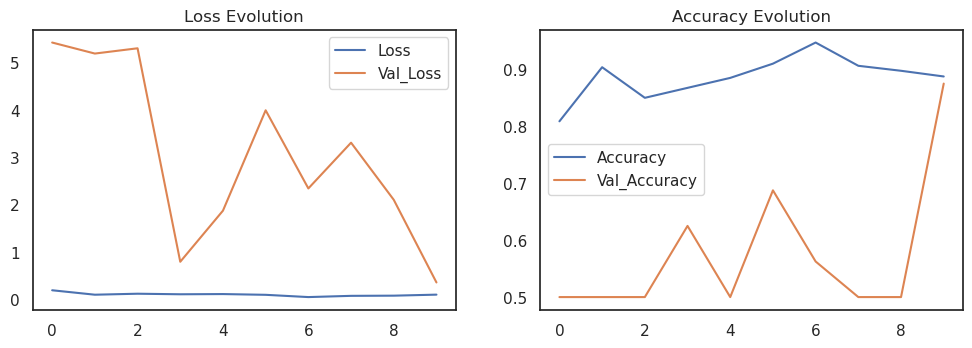

In [169]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [170]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7435 - loss: 0.6044
Test Accuracy: 76.92%
652/652 ━━━━━━━━━━━━━━━━━━━━ 270s 414ms/step - accuracy: 0.8236 - loss: 0.4354
Train Accuracy: 82.69%


In [171]:
predicted_vals = model.predict(test, steps=len(test))

624/624 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step


In [172]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[172  62]
 [ 82 308]]


0           1  accuracy   macro avg  weighted avg
precision    0.677165    0.832432  0.769231    0.754799      0.774207
recall       0.735043    0.789744  0.769231    0.762393      0.769231
f1-score     0.704918    0.810526  0.769231    0.757722      0.770923
support    234.000000  390.000000  0.769231  624.000000    624.000000

# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.


In [173]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

In [174]:
vgg16_base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:


vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
    
model = Sequential()
model.add(vgg16_model.layers[0])


In [176]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [177]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.6228 - loss: 0.2723 - precision: 0.8760 - recall: 0.5944 - val_accuracy: 0.5000 - val_loss: 3.5118 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10


2024-07-29 03:06:39.218064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/laaria/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.6845 - loss: 0.2237 - precision: 0.9347 - recall: 0.6351 - val_accuracy: 0.5625 - val_loss: 2.1445 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/10


2024-07-29 03:13:02.472713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.7487 - loss: 0.1898 - precision: 0.9237 - recall: 0.7122 - val_accuracy: 0.5000 - val_loss: 3.3796 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10


2024-07-29 03:19:22.314194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.7335 - loss: 0.2082 - precision: 0.9145 - recall: 0.7183 - val_accuracy: 0.5000 - val_loss: 10.2911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10


2024-07-29 03:25:53.049665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7445 - loss: 0.1919 - precision: 0.9166 - recall: 0.7289

2024-07-29 03:32:27.160078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.7444 - loss: 0.1920 - precision: 0.9164 - recall: 0.7289 - val_accuracy: 0.6250 - val_loss: 0.9719 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 372s 4s/step - accuracy: 0.7823 - loss: 0.1912 - precision: 0.9375 - recall: 0.7585 - val_accuracy: 0.5000 - val_loss: 4.1206 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 7/10


2024-07-29 03:38:41.955489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 52/100 ━━━━━━━━━━━━━━━━━━━━ 2:57 4s/step - accuracy: 0.8158 - loss: 0.1520 - precision: 0.9563 - recall: 0.7829

2024-07-29 03:41:54.027462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8085 - loss: 0.1592 - precision: 0.9481 - recall: 0.7783 - val_accuracy: 0.5000 - val_loss: 4.4291 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 8/10


2024-07-29 03:41:56.123406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.8482 - loss: 0.1357 - precision: 0.9626 - recall: 0.8181 - val_accuracy: 0.5625 - val_loss: 0.7033 - val_precision: 0.5455 - val_recall: 0.7500
Epoch 9/10


2024-07-29 03:48:13.031285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.8133 - loss: 0.1481 - precision: 0.9505 - recall: 0.7864 - val_accuracy: 0.7500 - val_loss: 0.6707 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 10/10


2024-07-29 03:54:40.791087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7999 - loss: 0.1570 - precision: 0.9317 - recall: 0.7804

2024-07-29 04:01:04.030531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.7999 - loss: 0.1569 - precision: 0.9318 - recall: 0.7804 - val_accuracy: 0.5000 - val_loss: 1.8558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


Text(0.5, 1.0, 'Accuracy Evolution')

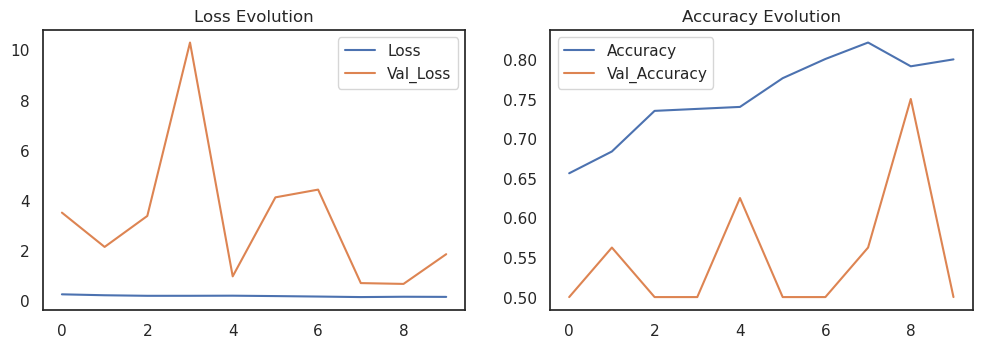

In [178]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [179]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.7813 - loss: 0.7569 - precision: 0.5600 - recall: 0.1153
Test Accuracy: 46.63%
652/652 ━━━━━━━━━━━━━━━━━━━━ 627s 961ms/step - accuracy: 0.3745 - loss: 2.3961 - precision: 0.9969 - recall: 0.1629
Train Accuracy: 38.02%


# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [180]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

In [181]:
resnet_base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 186, 186,  │          0 │ input_layer_18[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 45, 45,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 45, 45,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 45, 45,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 45, 45,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 45, 45,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 45, 45,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [182]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [183]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.6259 - loss: 0.2832 - precision: 0.8336 - recall: 0.6052 - val_accuracy: 0.5000 - val_loss: 1078.2449 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10


2024-07-29 04:18:23.440345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.6323 - loss: 0.2789 - precision: 0.8495 - recall: 0.6262 - val_accuracy: 0.5000 - val_loss: 348.0479 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10


2024-07-29 04:23:00.463009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.7170 - loss: 0.1985 - precision: 0.9191 - recall: 0.6931 - val_accuracy: 0.5000 - val_loss: 28.1462 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10


2024-07-29 04:27:40.439873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8253 - loss: 0.1512 - precision: 0.9474 - recall: 0.8088

2024-07-29 04:32:11.983301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.8253 - loss: 0.1513 - precision: 0.9473 - recall: 0.8090 - val_accuracy: 0.5000 - val_loss: 1.7177 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8062 - loss: 0.1789 - precision: 0.9290 - recall: 0.7987

2024-07-29 04:37:00.514230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.8061 - loss: 0.1788 - precision: 0.9290 - recall: 0.7986 - val_accuracy: 0.5000 - val_loss: 6.7065 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.8452 - loss: 0.1429 - precision: 0.9603 - recall: 0.8232 - val_accuracy: 0.5000 - val_loss: 2.1313 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 7/10


2024-07-29 04:41:51.838908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 52/100 ━━━━━━━━━━━━━━━━━━━━ 2:17 3s/step - accuracy: 0.8510 - loss: 0.1389 - precision: 0.9628 - recall: 0.8337

2024-07-29 04:44:20.842996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8475 - loss: 0.1426 - precision: 0.9572 - recall: 0.8317 - val_accuracy: 0.5000 - val_loss: 1.3728 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 8/10


2024-07-29 04:44:22.087333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.8272 - loss: 0.1457 - precision: 0.9469 - recall: 0.8186 - val_accuracy: 0.5000 - val_loss: 0.8914 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 9/10


2024-07-29 04:48:55.677613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.8532 - loss: 0.1392 - precision: 0.9643 - recall: 0.8393 - val_accuracy: 0.5000 - val_loss: 1.3947 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 10/10


2024-07-29 04:53:53.283433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.8812 - loss: 0.1278 - precision: 0.9430 - recall: 0.8858 - val_accuracy: 0.5000 - val_loss: 1.7029 - val_precision: 0.5000 - val_recall: 1.0000


2024-07-29 04:58:42.949065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Text(0.5, 1.0, 'Accuracy Evolution')

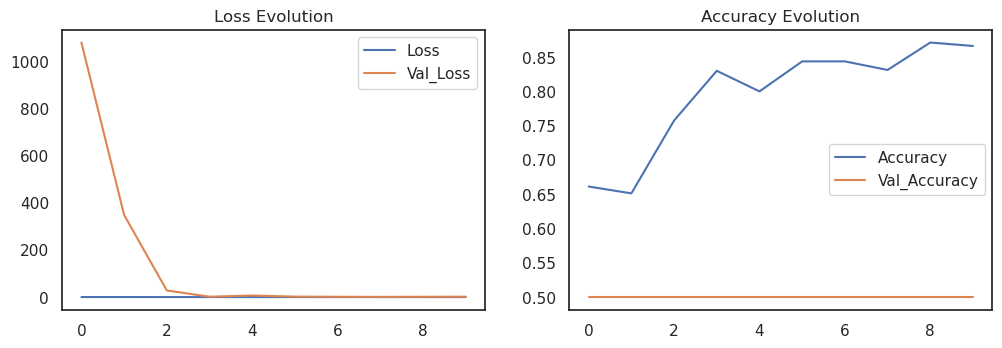

In [184]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [185]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.2870 - loss: 2.0868 - precision: 0.2612 - recall: 0.6256
Test Accuracy: 63.30%
652/652 ━━━━━━━━━━━━━━━━━━━━ 268s 411ms/step - accuracy: 0.7423 - loss: 0.7738 - precision: 0.7435 - recall: 0.9932
Train Accuracy: 74.98%


# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [186]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')



In [187]:
inception_model = Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [188]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.5786 - loss: 0.3145 - precision: 0.7829 - recall: 0.5707 - val_accuracy: 0.5000 - val_loss: 7.5221 - val_precision: 0.5000 - val_recall: 0.1250
Epoch 2/10


2024-07-29 05:08:36.091006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6769 - loss: 0.2328 - precision: 0.8781 - recall: 0.6458 - val_accuracy: 0.5000 - val_loss: 7518.9248 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10


2024-07-29 05:11:35.592844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5862 - loss: 0.2819 - precision: 0.8101 - recall: 0.5804

2024-07-29 05:14:34.938739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.5865 - loss: 0.2817 - precision: 0.8103 - recall: 0.5807 - val_accuracy: 0.5000 - val_loss: 71342.4062 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.6245 - loss: 0.2623 - precision: 0.8639 - recall: 0.5773 - val_accuracy: 0.5000 - val_loss: 168.8570 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10


2024-07-29 05:17:24.576684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7063 - loss: 0.2237 - precision: 0.8838 - recall: 0.6775

2024-07-29 05:20:13.318119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.7063 - loss: 0.2237 - precision: 0.8840 - recall: 0.6775 - val_accuracy: 0.6875 - val_loss: 0.4552 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.7636 - loss: 0.2026 - precision: 0.9228 - recall: 0.7283 - val_accuracy: 0.5000 - val_loss: 0.7682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 7/10


2024-07-29 05:23:09.283831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 52/100 ━━━━━━━━━━━━━━━━━━━━ 1:23 2s/step - accuracy: 0.6752 - loss: 0.2324 - precision: 0.8445 - recall: 0.6691

2024-07-29 05:24:38.968071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 902ms/step - accuracy: 0.6915 - loss: 0.2276 - precision: 0.8623 - recall: 0.6845 - val_accuracy: 0.5625 - val_loss: 0.9894 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 8/10


2024-07-29 05:24:39.914711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7393 - loss: 0.1955 - precision: 0.9198 - recall: 0.7268 - val_accuracy: 0.8125 - val_loss: 0.3801 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 9/10


2024-07-29 05:27:27.004023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.7808 - loss: 0.1764 - precision: 0.9393 - recall: 0.7567 - val_accuracy: 0.5625 - val_loss: 1.0650 - val_precision: 0.6667 - val_recall: 0.2500
Epoch 10/10


2024-07-29 05:30:17.338431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.7510 - loss: 0.1844 - precision: 0.9393 - recall: 0.7319 - val_accuracy: 0.5625 - val_loss: 1.3050 - val_precision: 0.5333 - val_recall: 1.0000


2024-07-29 05:33:19.592184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Text(0.5, 1.0, 'Accuracy Evolution')

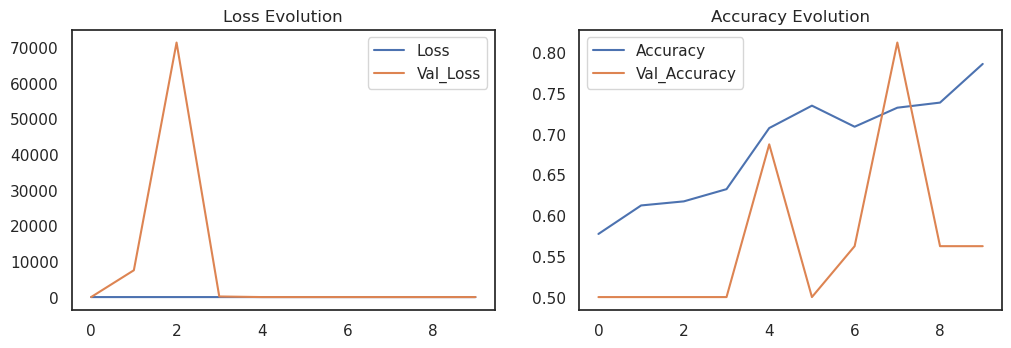

In [189]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [190]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.6771 - loss: 0.9118 - precision: 0.3678 - recall: 0.5775
Test Accuracy: 79.17%
652/652 ━━━━━━━━━━━━━━━━━━━━ 153s 234ms/step - accuracy: 0.8956 - loss: 0.4692 - precision: 0.9639 - recall: 0.8929
Train Accuracy: 89.57%


### COMPARING THE DIFFERENT MODELS

In [1]:
model_mae_scores_dict = {'CNN': 78.37, 'DenseNet' : 76.92, 'VGG16' : 46.63, 'ResNet' : 63.30, 'InceptionNet' : 79.17}


In [4]:
model_mae_scores = pd.Series(model_mae_scores_dict)


In [5]:
model_mae_scores


CNN             78.37
DenseNet        76.92
VGG16           46.63
ResNet          63.30
InceptionNet    79.17
dtype: float64

In [6]:
order = model_mae_scores.sort_values()

Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

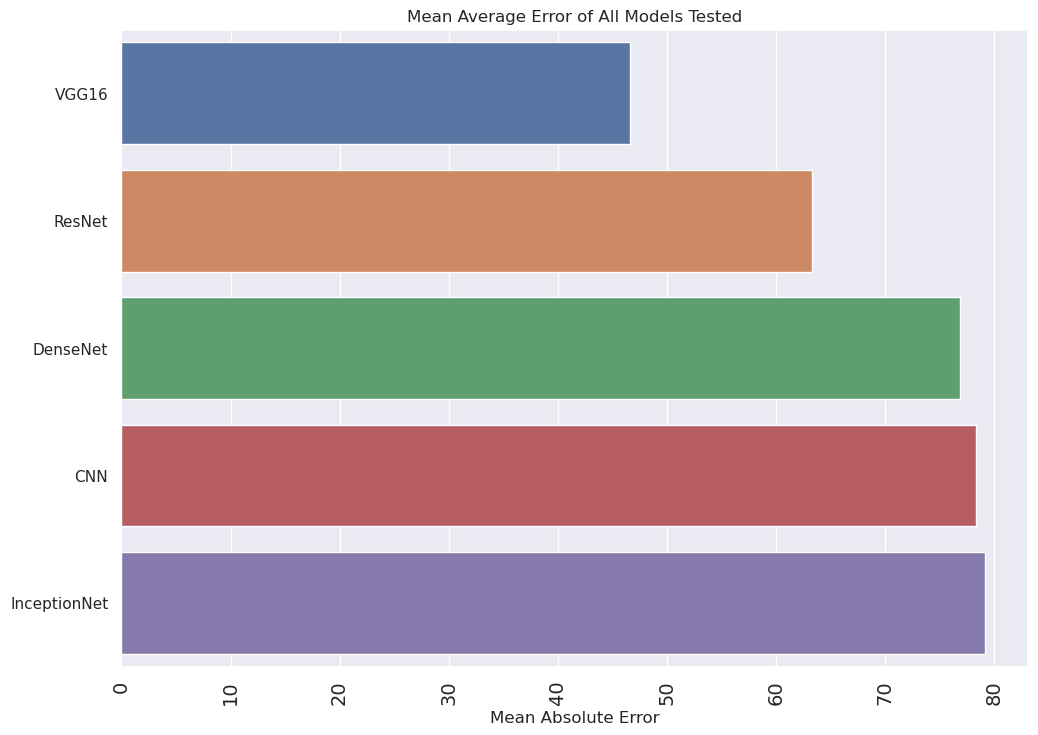

In [7]:
from matplotlib import pyplot
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=order.values, y = order.index, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')

### OBSERVATIONS

1) We will deploy our best performing model,the InceptionNet.

2) By using pretrained models like ResNet, VGG, and  DenseNet and fine-tuning them  resulted in better performance compared to training models from scratch.

3) Models trained on specific datasets may not generalize well to data from different hospitals or demographic groups. It’s important to validate models on diverse datasets to ensure they are robust and generalizable.

### RECOMMENDATIONS

1) Integrate with Existing Systems: Ensure the model can be seamlessly integrated into existing hospital IT systems and clinical workflows to enhance usability.

2) Optimize for Real-Time Use: Develop the model to provide real-time predictions, aiding clinicians in making timely and accurate diagnoses.

3) Implement Continuous Learning: Establish a process for ongoing data collection, model retraining, and validation to keep the model updated with new information and medical advancements.

4) Involve Clinicians in Development: Collaborate closely with radiologists and other healthcare providers to ensure the model meets clinical needs and addresses practical challenges.

5) Ensure Accurate Labeling: Engage experienced radiologists to accurately annotate chest X-ray images, ensuring reliable ground truth for training the model.

6) Align with Strategic Goals: Ensure the project aligns with the organization’s strategic objectives, such as improving diagnostic accuracy, reducing healthcare costs, and enhancing patient outcomes.


### CONCLUSION

In conclusion, our best model did very well at identifying the pneumonia images with 79.17 % accuracy and 93.3% recall. We care most about the recall score because this represents how well our model does at predicting the class of images belonging to those with pneumonia. Given our business case, false negatives (patient has pneumonia but we classify them as healthy) are much more dangerous than false positives (patient is healthy but we classify them as having pneumonia).

Meanwhile, we can keep tuning our model based on the feedback in order to improve our recall. Plus, there are many pre-trained neural network models already available online, so we can run our data on those models and make some improvements to our model by comparing our model with those pre-trained models. Lastly, we don't have strong background knowledge on identifying Pneumonia from an X-Ray image, so it is necessary to tackle this issue with domain experts and consult them on questions such as, what features in an X-Ray image that our model misclassified could a radiologist point out to modify our model.
